In [ ]:
import itertools

import numpy as np
from scipy.stats import norm


# ----------- define the two distributions -----------
def p_logpdf(x):
    return np.logaddexp(
        norm.logpdf(x, -2, 1),  # log( e^a + e^b )
        norm.logpdf(x, 2, 1),
    ) - np.log(2)


def q_logpdf(x, mu, sigma):
    return norm.logpdf(x, mu, sigma)


# Monte‑Carlo estimator of KL
def kl_p_q(mu, sigma, n=50_000):
    x = np.random.randn(n)  # sample from p by mixture sampling
    which = np.random.rand(n) < 0.5
    x[which] = x[which] * 1 + (-2)
    x[~which] = x[~which] * 1 + (2)
    return np.mean(p_logpdf(x) - q_logpdf(x, mu, sigma))


def kl_q_p(mu, sigma, n=50_000):
    x = np.random.randn(n) * sigma + mu  # sample from q
    return np.mean(q_logpdf(x, mu, sigma) - p_logpdf(x))


# ----------- grid search -----------
mus = np.linspace(-4, 4, 41)
sigmas = np.linspace(0.3, 4.0, 38)

best_fwd = (None, 1e9)
best_rev = (None, 1e9)

for mu, sigma in itertools.product(mus, sigmas):
    fwd = kl_p_q(mu, sigma)
    rev = kl_q_p(mu, sigma)
    if fwd < best_fwd[1]:
        best_fwd = ((mu, sigma), fwd)
    if rev < best_rev[1]:
        best_rev = ((mu, sigma), rev)

print(
    "Forward  KL optimum (p‖q)  : μ = %.2f, σ = %.2f" % best_fwd[0],
    "   value ≈ %.3f" % best_fwd[1],
)
print(
    "Reverse  KL optimum (q‖p)  : μ = %.2f, σ = %.2f" % best_rev[0],
    "   value ≈ %.3f" % best_rev[1],
)

Forward  KL optimum (p‖q)  : μ = 0.00, σ = 2.30    value ≈ 0.173
Reverse  KL optimum (q‖p)  : μ = 0.00, σ = 2.00    value ≈ 0.225


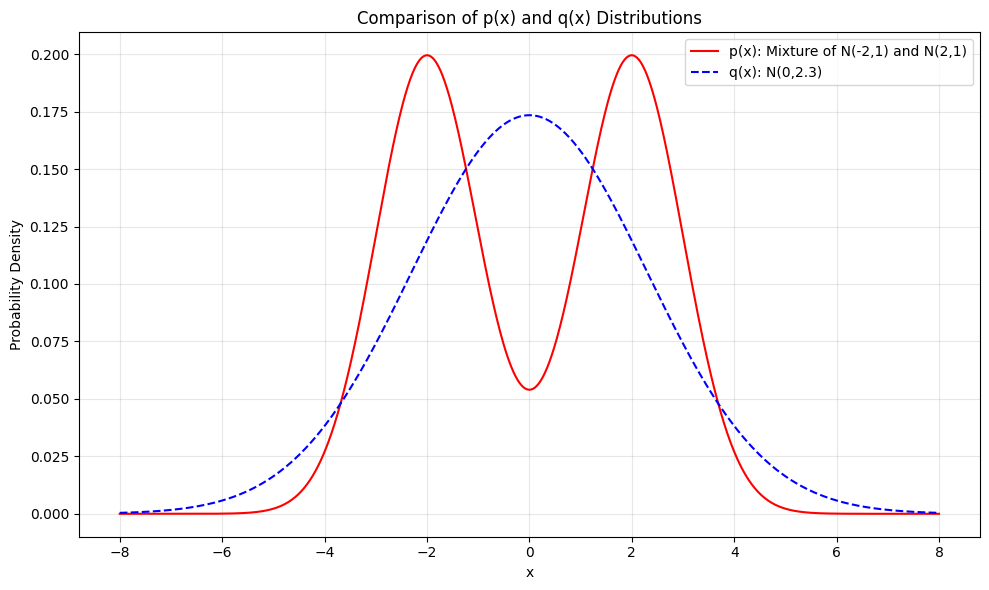

In [ ]:
import matplotlib.pyplot as plt

# Define the x range for plotting
x = np.linspace(-8, 8, 1000)

# Compute the values for p and q
p_values = np.exp(p_logpdf(x))  # Convert from log domain to probability
q_values = np.exp(q_logpdf(x, mu=0, sigma=2.3))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, p_values, "r-", label="p(x): Mixture of N(-2,1) and N(2,1)")
plt.plot(x, q_values, "b--", label="q(x): N(0,2.3)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Comparison of p(x) and q(x) Distributions")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

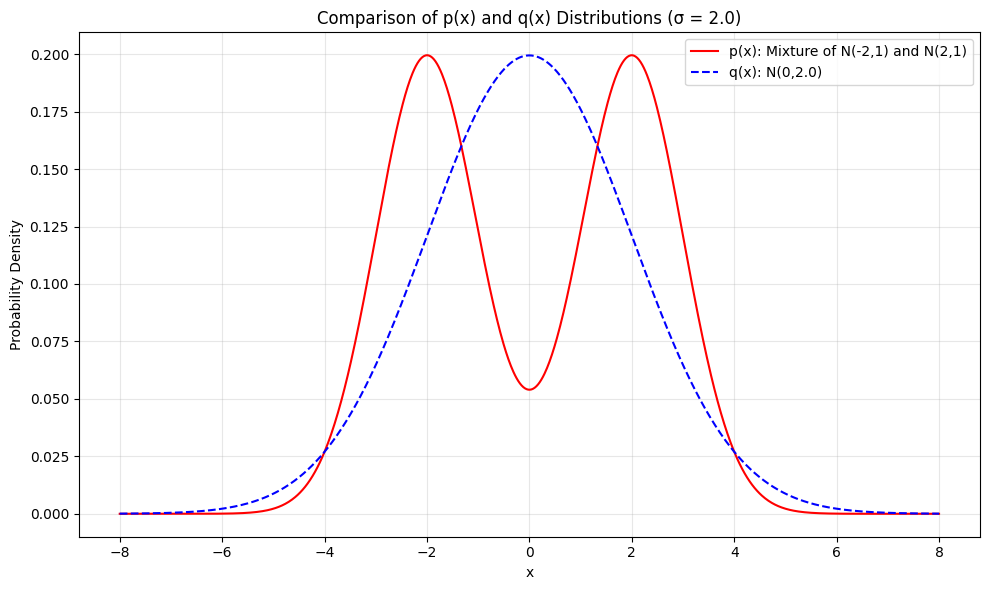

In [ ]:
import matplotlib.pyplot as plt

# Define the x range for plotting
x = np.linspace(-8, 8, 1000)

# Compute the values for p and q
p_values = np.exp(p_logpdf(x))  # Convert from log domain to probability
q_values = np.exp(q_logpdf(x, mu=0, sigma=2.0))  # Using sigma = 2.0

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, p_values, "r-", label="p(x): Mixture of N(-2,1) and N(2,1)")
plt.plot(x, q_values, "b--", label="q(x): N(0,2.0)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Comparison of p(x) and q(x) Distributions (σ = 2.0)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Forward  KL optimum: μ=0.00, σ=2.25, KL≈0.171
Reverse  KL optimum: μ=0.00, σ=2.10, KL≈0.225


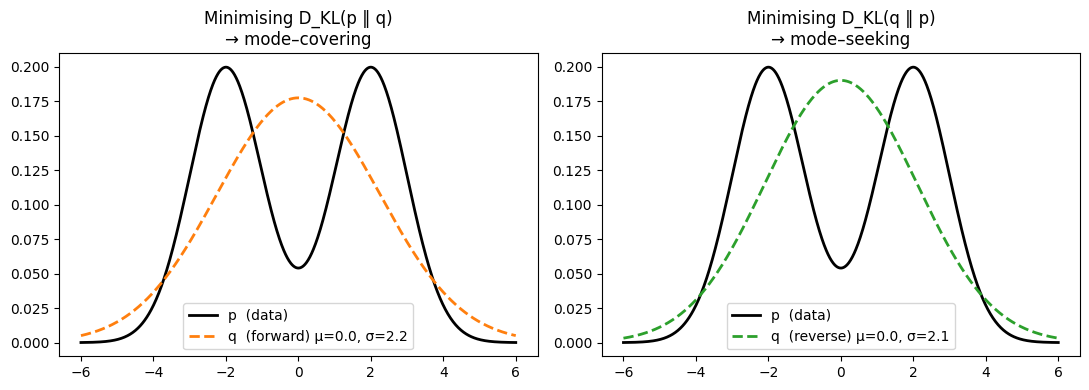

In [ ]:
import itertools

import matplotlib.pyplot as plt
import numpy as np


# ------------------------------------------------------------
# 1.  Define p  (mixture of two unit–variance Gaussians at -2 and +2)
# ------------------------------------------------------------
def p_logpdf(x):
    # log 0.5 [ N(x|-2,1) + N(x|+2,1) ]
    return np.logaddexp(norm.logpdf(x, -2, 1), norm.logpdf(x, 2, 1)) - np.log(2)


def p_pdf(x):  # convenience for plotting
    return np.exp(p_logpdf(x))


# ------------------------------------------------------------
# 2.  Define q (single Gaussian with free μ, σ)
# ------------------------------------------------------------
def q_logpdf(x, mu, sigma):
    return norm.logpdf(x, mu, sigma)


def q_pdf(x, mu, sigma):  # convenience for plotting
    return norm.pdf(x, mu, sigma)


# ------------------------------------------------------------
# 3.  Monte‑Carlo estimators of both KL directions
# ------------------------------------------------------------
def kl_p_q(mu, sigma, n=50_000):  # D_KL(p‖q)
    # sample from p
    z = np.random.randn(n)
    choose_left = np.random.rand(n) < 0.5
    x = np.where(choose_left, z - 2, z + 2)
    return np.mean(p_logpdf(x) - q_logpdf(x, mu, sigma))


def kl_q_p(mu, sigma, n=50_000):  # D_KL(q‖p)
    # sample from q
    x = np.random.randn(n) * sigma + mu
    return np.mean(q_logpdf(x, mu, sigma) - p_logpdf(x))


# ------------------------------------------------------------
# 4.  Very small grid‑search to locate good (μ, σ)
#     (good enough for illustration; you can refine if you like)
# ------------------------------------------------------------
mus = np.linspace(-4, 4, 81)
sigmas = np.linspace(0.3, 4.0, 75)

best_fwd = ((None, None), 1e9)
best_rev = ((None, None), 1e9)

for mu, sigma in itertools.product(mus, sigmas):
    fwd = kl_p_q(mu, sigma)
    rev = kl_q_p(mu, sigma)
    if fwd < best_fwd[1]:
        best_fwd = ((mu, sigma), fwd)
    if rev < best_rev[1]:
        best_rev = ((mu, sigma), rev)

(mu_fwd, sigma_fwd) = best_fwd[0]
(mu_rev, sigma_rev) = best_rev[0]

print(f"Forward  KL optimum: μ={mu_fwd:.2f}, σ={sigma_fwd:.2f}, KL≈{best_fwd[1]:.3f}")
print(f"Reverse  KL optimum: μ={mu_rev:.2f}, σ={sigma_rev:.2f}, KL≈{best_rev[1]:.3f}")

# ------------------------------------------------------------
# 5.  Visualisation
# ------------------------------------------------------------
x = np.linspace(-6, 6, 1000)

plt.figure(figsize=(11, 4))

# ---- left panel: forward KL (mode–covering) ----
plt.subplot(1, 2, 1)
plt.plot(x, p_pdf(x), "k-", lw=2, label="p  (data)")
plt.plot(
    x,
    q_pdf(x, mu_fwd, sigma_fwd),
    "C1--",
    lw=2,
    label=f"q  (forward) μ={mu_fwd:.1f}, σ={sigma_fwd:.1f}",
)
plt.title("Minimising D_KL(p ‖ q)\n→ mode–covering")
plt.legend()

# ---- right panel: reverse KL (mode–seeking) ----
plt.subplot(1, 2, 2)
plt.plot(x, p_pdf(x), "k-", lw=2, label="p  (data)")
plt.plot(
    x,
    q_pdf(x, mu_rev, sigma_rev),
    "C2--",
    lw=2,
    label=f"q  (reverse) μ={mu_rev:.1f}, σ={sigma_rev:.1f}",
)
plt.title("Minimising D_KL(q ‖ p)\n→ mode–seeking")
plt.legend()

plt.tight_layout()
plt.show()

Forward  KL minimum:  μ = -0.02 , σ =  6.08
Reverse  KL minimum:  μ = -0.00 , σ =  1.00


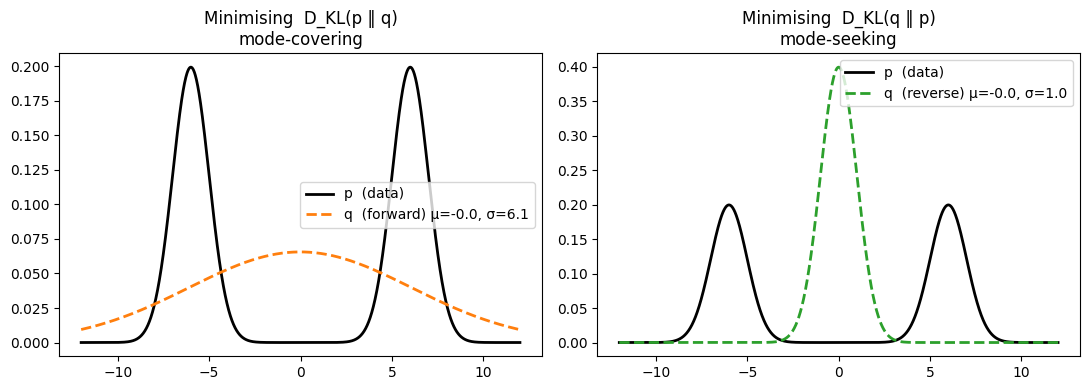

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

np.random.seed(0)  # reproducibility
N_SAMPLES = 200_000  # MC sample size for all estimates


# ------------------------------------------------------------------
# 1.  The true distribution p:  ½ N(-6,1)  +  ½ N(+6,1)
# ------------------------------------------------------------------
def p_logpdf(x):
    return np.logaddexp(norm.logpdf(x, -6, 1), norm.logpdf(x, 6, 1)) - np.log(2)


def p_pdf(x):
    return np.exp(p_logpdf(x))


def sample_p(n):
    z = np.random.randn(n)
    left = np.random.rand(n) < 0.5
    return z + np.where(left, -6, 6)


# ------------------------------------------------------------------
# 2.  A candidate q:  single Gaussian  N(μ, σ²)
# ------------------------------------------------------------------
def q_logpdf(x, mu, sigma):
    return norm.logpdf(x, mu, sigma)


def q_pdf(x, mu, sigma):
    return norm.pdf(x, mu, sigma)


# ------------------------------------------------------------------
# 3.  Monte‑Carlo KL estimators (forward and reverse)
# ------------------------------------------------------------------
x_from_p = sample_p(N_SAMPLES)  # fix one big sample for speed


def forward_kl(theta):
    mu, log_sigma = theta
    sigma = np.exp(log_sigma)
    return np.mean(p_logpdf(x_from_p) - q_logpdf(x_from_p, mu, sigma))


def reverse_kl(theta):
    mu, log_sigma = theta
    sigma = np.exp(log_sigma)
    # sample once per call so that the objective is stochastic;
    # that is fine for optimisation by Nelder‑Mead.
    x_q = mu + sigma * np.random.randn(10_000)
    return np.mean(q_logpdf(x_q, mu, sigma) - p_logpdf(x_q))


# ------------------------------------------------------------------
# 4.  Optimise both objectives
# ------------------------------------------------------------------
opt_fwd = minimize(forward_kl, x0=[0.0, 0.0], method="Nelder-Mead")
opt_rev = minimize(reverse_kl, x0=[0.0, 0.0], method="Nelder-Mead")

mu_fwd, sigma_fwd = opt_fwd.x[0], np.exp(opt_fwd.x[1])
mu_rev, sigma_rev = opt_rev.x[0], np.exp(opt_rev.x[1])

print(f"Forward  KL minimum:  μ = {mu_fwd:5.2f} , σ = {sigma_fwd:5.2f}")
print(f"Reverse  KL minimum:  μ = {mu_rev:5.2f} , σ = {sigma_rev:5.2f}")

# ------------------------------------------------------------------
# 5.  Plot
# ------------------------------------------------------------------
x = np.linspace(-12, 12, 2000)

plt.figure(figsize=(11, 4))

# -- left: forward KL (mode‑covering) ------------------------------
plt.subplot(1, 2, 1)
plt.plot(x, p_pdf(x), "k-", lw=2, label="p  (data)")
plt.plot(
    x,
    q_pdf(x, mu_fwd, sigma_fwd),
    "C1--",
    lw=2,
    label=f"q  (forward) μ={mu_fwd:.1f}, σ={sigma_fwd:.1f}",
)
plt.title("Minimising  D_KL(p ‖ q)\nmode‑covering")
plt.legend()

# -- right: reverse KL (mode‑seeking) ------------------------------
plt.subplot(1, 2, 2)
plt.plot(x, p_pdf(x), "k-", lw=2, label="p  (data)")
plt.plot(
    x,
    q_pdf(x, mu_rev, sigma_rev),
    "C2--",
    lw=2,
    label=f"q  (reverse) μ={mu_rev:.1f}, σ={sigma_rev:.1f}",
)
plt.title("Minimising  D_KL(q ‖ p)\nmode‑seeking")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
np.log(0.01 / 0.8)

np.float64(-4.382026634673882)